In [ ]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats


# Question 1

Belief/suspicion that we want to test:  Do smokers have higher insurance charges than non-smokers?

Null Hypothesis "Smoking does not result in higher insurance charges."
Alternate Hypothesis: "Smoking results in higher insurance charges"


I would choose to reject the null hypothesis

In [12]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv')
df = df.dropna(subset=['smoker'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})

Text(0.5, 1.0, 'Insurance charges based on smoking status')

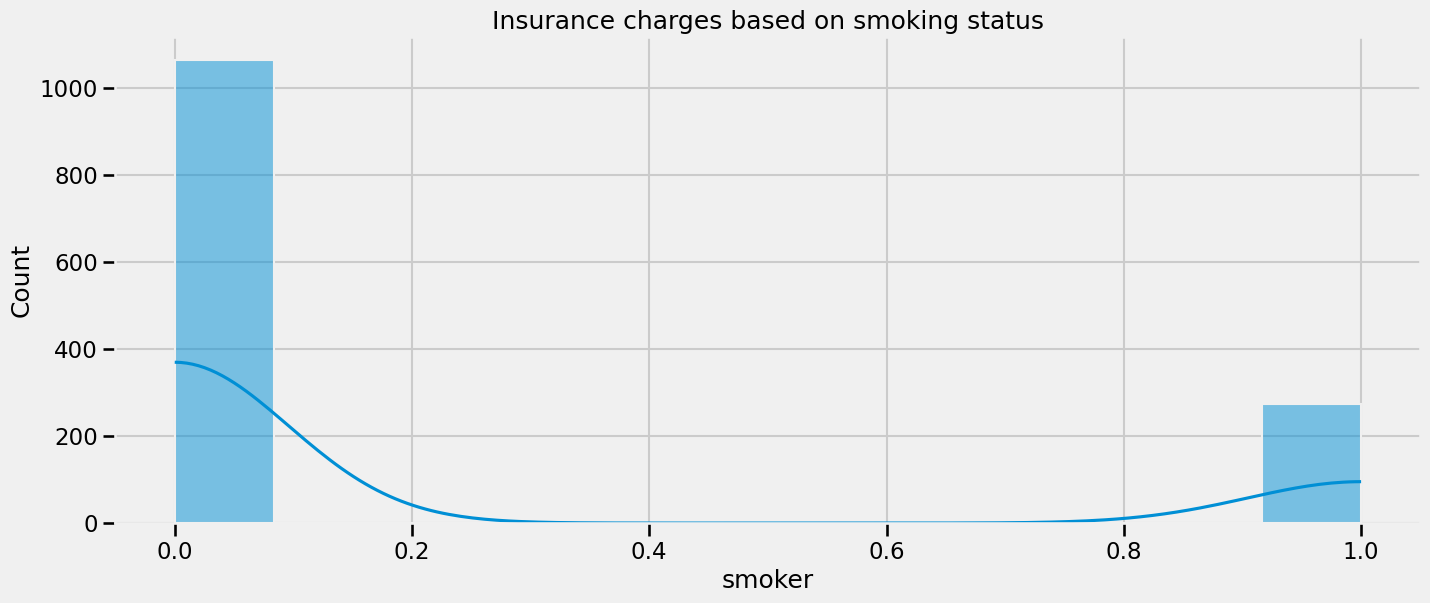

In [21]:
## Slice out data and calc stats
data = df['smoker'].copy()
#mean = np.mean(data)
#med = np.median(data)
## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=data, kde=True, ax=ax) #stat='density')
ax.set_title('Insurance charges based on smoking status')
## Annotate mean and median
#ax.axvline(mean,ls=':', color='black', lw=3, label =f"Mean: {mean:.2f}")
#ax.axvline(med,ls='--', color='green', lw=3, label =f"Median: {med:.2f}")
#ax.legend()


In [22]:
# note that data was previously defined as 
# data = df['runtime'].copy()
result = stats.normaltest(data)
print(result)
# Is the p-value less than 0.05?
result.pvalue < .05

NormaltestResult(statistic=275.33187548502445, pvalue=1.630958432034592e-60)


True

Outcome:

pvalue 1.63 > 0.05

I reject the NULL hypothesis an support the Alternative Hypothesis/ error type 2

My assumption was to reject the NULL hypothesis however that was incorrect because the p value is greater than the alpha therefore we should fail to reject the NULL hypothesis.

Smoking status does not increase charges.

# Question 2

In [ ]:
Belief/suspicion that we want to test:  Are men more likely to smoke than women?

Null Hypothesis "Men and woman are equally likely to smoke."
Alternate Hypothesis: "Men are more likely to smoke than woman"

I would choose to reject the null hypothesis

In [40]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv')

In [41]:
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})

In [61]:

sample = df.sample(n=50,random_state=42)
female_smoker = sample.loc[sample['sex']=='female',"smoker"]
male_smoker = sample.loc[sample['sex']=='male',"smoker"]
## Getting means for gender height
print(f"For Males (n={len(male_smoker)}): Mean={np.mean(male_smoker):.2f}")
print(f"For Females (n={len(female_smoker)}): Mean={np.mean(female_smoker):.2f}")


For Males (n=23): Mean=0.30
For Females (n=27): Mean=0.15


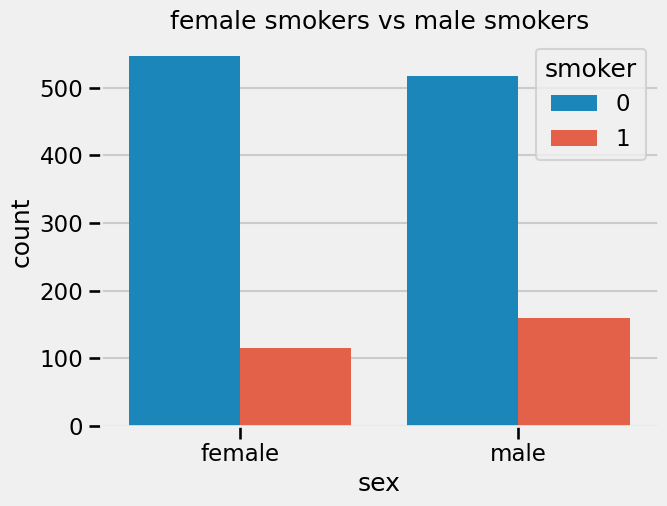

In [62]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("female smokers vs male smokers");


In [63]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,0,1
sex,,
female,547,115
male,517,159


In [64]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [65]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

Since our p < .05, we will reject the null hypothesis that men and woman are equally likely to smoke.


I accept the alternate hypothesis and conclude that there is a Men are more likely to smoke than woman

# Question 3

Belief/suspicion that we want to test:  Do different regions have different charges, on average?

Null Hypothesis "The average charges do not differ between regions."
Alternate Hypothesis: "The average of charges is determined by your region"

I would fail to reject the Null Hypothesis

In [66]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv')

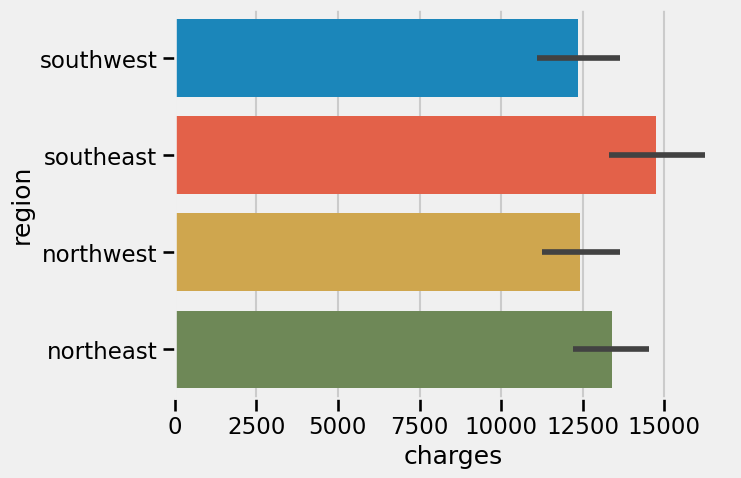

In [69]:
sns.barplot(data=df, x='charges',y='region');



Hypothesis:

Null Hypothesis, no major differences between regions.

In [73]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()



dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [74]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df


,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [67]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
values = df['charges']
labels = df['region']



In [75]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [78]:
# not using * operator, entering each group manually
stats.levene(groups['southwest'],
            groups['southeast'],
            groups['northeast'],
            groups['northwest'])

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [79]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result


F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

In [68]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


Since our p < .05, we will reject the null hypothesis that the average charges do not differ between regions


I accept the alternate hypothesis and conclude that the charges do differ between regions.